## <font color='darkblue'>Preface</font>
([article source](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)) <b><font size='3ptx'>In languages the order of the words and their position in a sentence really matters.</font></b>

<b>The meaning of the entire sentence can change if the words are re-ordered</b>. When implementing NLP solutions, the recurrent neural networks have an inbuilt mechanism that deals with the order of sequences. <b>The transformer model, however, does not use recurrence or convolution and treats each data point as independent of the other. Hence, positional information is added to the model explicitly to retain the information regarding the order of words in a sentence. Positional encoding is the scheme through which the knowledge of order of objects in a sequence is maintained</b>.

For this tutorial, we’ll simplify the notations used in this awesome paper [Attention is all You Need](https://arxiv.org/abs/1706.03762) by Vaswani et al. After completing this tutorial, you will know:
* What is positional encoding and why it’s important
* Positional encoding in transformers
* Code and visualize a positional encoding matrix in Python using NumPy

### <font color='darkgreen'>Tutorial Overview</font>
This tutorial is divided into four parts; they are:
1. <b><font size='3ptx'><a href='#sect1'>What is positional encoding</a></font></b>
2. <b><font size='3ptx'><a href='#sect2'>Mathematics behind positional encoding in transformers</a></font></b>
3. <b><font size='3ptx'><a href='#sect3'>Implementing the positional encoding matrix using NumPy</a></font></b>
4. <b><font size='3ptx'><a href='#sect4'>Understanding and visualizing the positional encoding matrix</a></font></b>

<a id='sect1'></a>
## <font color='darkblue'>What is Positional Encoding?</font>
<b><font size='3ptx'>Positional encoding describes the location or position of an entity in a sequence so that each position is assigned a unique representation.</font></b>

<b>There are many reasons why a single number such as the index value is not used to represent an item’s position in transformer models</b>. For long sequences, the indices can grow large in magnitude. If you normalize the index value to lie between 0 and 1, it can create problems for variable length sequences as they would be normalized differently.

<b>Transformers use a smart positional encoding scheme, where each position/index is mapped to a vector. Hence, the output of the positional encoding layer is a matrix, where each row of the matrix represents an encoded object of the sequence summed with its positional information</b>. An example of the matrix that encodes only the positional information is shown in the figure below:

![Positional encoding matrix](images/1.PNG)

<br/>

<a id='sect2'></a>
## <font color='darkblue'>Mathematics behind positional encoding in transformers</font>

### <font color='darkgreen'>A Quick Run-Through Trigonometric Sine Function</font>
This is a quick recap of sine functions and you can work equivalently with cosine functions. The function’s range is $[-1,+1]$. The frequency of this waveform is the number of cycles completed in one second. The wavelength is the distance over which the waveform repeats itself. The wavelength and frequency for different waveforms is shown below:
![Positional encoding matrix](images/2.PNG)

### <font color='darkgreen'>Positional Encoding Layer in Transformers</font>
Let’s dive straight into this. Suppose we have an input sequence of length `L` and we require the position of the $k^{th}$ object within this sequence. The positional encoding is given by sine and cosine functions of varying frequencies:
![Positional encoding matrix](images/3.PNG)

<br/>

Here:
* `k`: Position of an object in input sequence, $0 \leq k < \frac{L}{2}$
* `d`: Dimension of the output embedding space
* $P(k,j)$: Position function for mapping a position  in the input sequence to index $(k,j)$ of the positional matrix
* `n`: User defined scalar. Set to 10,000 by the authors of [Attention is all You Need](https://arxiv.org/abs/1706.03762).
* `i`: Used for mapping to column indices $ 0 \leq i < \frac{d}{2}$ . A single value of  maps to both sine and cosine functions

In the above expression we can see that even positions correspond to sine function and odd positions correspond to even positions.

### <font color='darkgreen'>Example</font>
To understand the above expression, let’s take an example of the phrase ‘I am a robot’, with `n=100` and `d=4`. The following table shows the positional encoding matrix for this phrase. In fact the positional encoding matrix would be the same for any 4 letter phrase with `n=100` and `d=4`:
![Positional encoding matrix](images/4.PNG)

<br/>

<a id='sect3'></a>
## <font color='darkblue'>Implementing the positional encoding matrix using NumPy</font>

### <font color='darkgreen'>Coding the Positional Encoding Matrix From Scratch</font>
Here is a short Python code to implement positional encoding using NumPy. The code is simplified to make the understanding of positional encoding easier:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


### <font color='darkgreen'>Understanding the Positional Encoding Matrix</font>
To understand the positional encoding, let’s start by looking at the sine wave for different positions with `n=10,000` and `d=512`.

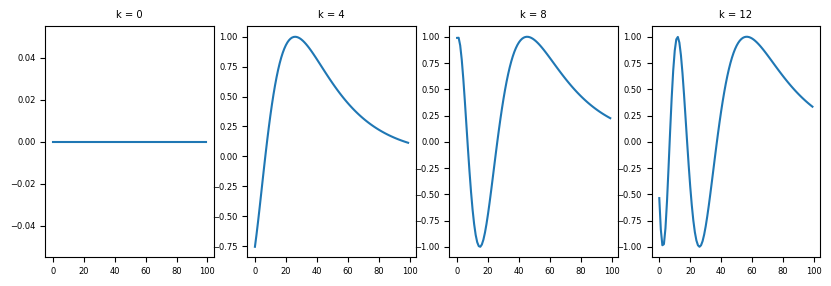

In [7]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

plt.rcParams.update({'font.size': 6})
fig = plt.figure(figsize=(10, 3))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

<b>We can see that each position `k` corresponds to a different sinusoid, which encodes a single position into a vector</b>. If we look closely at the positional encoding function, we can see that the wavelength for a fixed  is given by:
> $λ_i = 2πn^{2i/d}$

<br/>

Hence, the wavelengths of the sinusoids form a geometric progression and vary  from 2π to 2πn. The scheme for positional encoding has a number of advantages:
1. The sine and cosine functions have values in `[-1, 1]`, which keeps the values of the positional encoding matrix in a normalized range.
2. As the sinusoid for each position is different, we have a unique way of encoding each position.
3. We have a way of measuring or quantifying the similarity between different positions, hence enabling us to encode relative positions of words.

<a id='sect4'></a>
## <font color='darkblue'>Understanding and visualizing the positional encoding matrix</font>
Let’s visualize the positional matrix on bigger values. We’ll use Python’s [matshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html) method from the matplotlib library. Setting `n=10,000` as done in the original paper, we get the following:

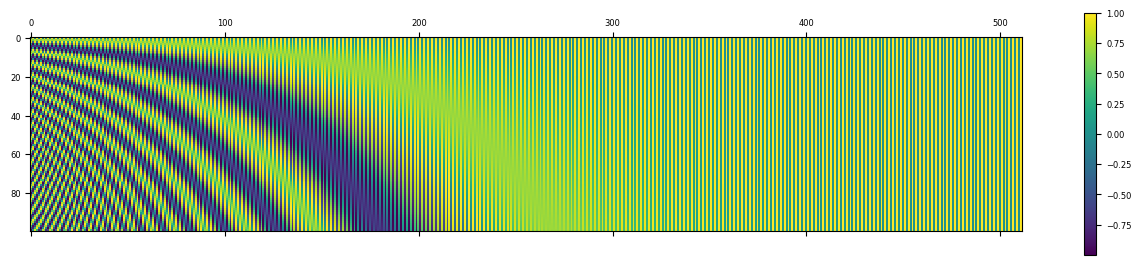

In [8]:
P = getPositionEncoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)

### <font color='darkgreen'>What is the Final Output of the Positional Encoding Layer?</font>
The positional encoding layer sums the positional vector with the word encoding and outputs this matrix for the next layers. The entire process is shown below.

![Positional encoding matrix](images/5.PNG)

## <font color='darkblue'>Further Reading</font>
This section provides more resources on the topic if you are looking to go deeper.
* **Books**
    * [Transformers for natural language processing, by Denis Rothman.](https://www.amazon.com/Transformers-Natural-Language-Processing-architectures/dp/1800565798)
* **Papers**
    * [Attention Is All You Need, 2017.](https://arxiv.org/abs/1706.03762)
* **Articles**
    * [The Transformer Attention Mechanism](https://machinelearningmastery.com/the-transformer-attention-mechanism/)
    * [The Transformer Model](https://machinelearningmastery.com/the-transformer-model/)
    * [Transformer model for language understanding](https://www.tensorflow.org/text/tutorials/transformer)
* **Youtubes**
    * [【機器學習2021】自注意力機制 (Self-attention) (上)](https://www.youtube.com/watch?v=hYdO9CscNes&t=6s)
    * [【機器學習2021】自注意力機制 (Self-attention) (下)](https://www.youtube.com/watch?v=gmsMY5kc-zw)